<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="360">

# EDA on IPL's Data

!["IPL Logo"](IPL_Logo.png "Title")

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [**Analyse how extraneous factors affect RCB**](#section501)<br>
    - 5.1.1 [Is toss affecting RCB?](#section50101)<br>
    - 5.1.2 [Does venue affect the results?](#section50102)<br>
  - 5.2 [**Analyse how pressure affects RCB**](#section502)<br>
      - 5.2.1 [How have RCB fared in high score chasing games?](#section50201)<br>
      - 5.2.2 [How have RCB fared in low score defending games?](#section50202)<br>
      - 5.2.3 [How have RCB performed in nail-biting finishes?](#section50203)<br>
      - 5.2.4 [How have RCB performed in superovers?](#section50204)<br>
      - 5.2.5 [How has RCB performed in playoffs and finale matches?](#section50205)<br> 
  - 5.3 [**Analyze how is RCB's batting**](#section503)<br>
    - 5.3.1 [How many players from each team contribute more than 20 runs in a match?](#section50301)<br>
    - 5.3.2 [How many players from each team contribute more than 300 runs in a season?](#section50302)<br>
    - 5.3.3 [How is RCB's scoring range for all matches?](#section50303)<br>
    - 5.3.4 [What is RCB's strike rate in last 30 balls (death batting)?](#section50304)<br>
    - 5.3.5 [How is the lower middle order for RCB?](#section50305)<br>
  - 5.4 [**Analyze how is RCB's bowling**](#section504)<br>
    - 5.4.1 [How is the wickets scalped range and runs conceded range for RCB for all matches?](#section50401)<br>
    - 5.4.2 [How many players from each team contribute more than 10 wickets in a season?](#section50402)<br>
    - 5.4.3 [How is RCB's bowling in last 30 balls (death bowling)?](#section50403)<br>
    - 5.4.4 [How many players from each team contribute more than 1 wicket in a match?](#section50404)<br><br>
6. [Conclusion](#section6)
  - 6.1 [Actionable Insights](#section601)

<a id=section1></a>
## 1. Problem Statement

Team RCB usally has big names associated with it, they have been to the finals thrice but have been able to seal the trophy. Let's us dig deep into various aspects affecting a team's victory in cricket and see what needs to improved upon by RCB. I will juxtapose few key factors/ characteristics of RCB with 3 other successful teams viz. MI (4 titles), CSK (3 titles) and KKR (2 titles).

<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

C:\Users\91903\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [3]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

<a id=section3></a>
## 3. Loading the data

#### We are going to use two datasheets.
#### All Indian Premier League Cricket matches between 2008 and 2016. 
#### This is the ball by ball data of all the IPL cricket matches till season 9.
#### The dataset contains 2 files: deliveries.csv and matches.csv.
#### matches.csv contains details related to the match such as location, contesting teams, umpires, results, etc.
#### deliveries.csv is the ball-by-ball data of all the IPL matches including data of the batting team, batsman, bowler, non-striker, runs scored, etc.


### Importing first data set

In [4]:
# Importing the 1st dataset (deliveries dataset for IPL data)

deliveries = pd.read_csv(r'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/deliveries.csv')
deliveries.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


<a id=section301></a>
### Description of the Dataset

- This dataset provides ** ball-by-ball data** of all the IPL matches including data of the batting team, batsman, bowler, non-striker, runs scored, etc.


- Brief information about each deliveries column are as below


| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| match id                       | This is the id of each match                                                               | 
| inning                         | This mentions the innings of the match( 3 or 4 in case of super over)                      | 
| batting_team                   | The team name which is currently batting                                                   | 
| bowling_team                   | The team name which is currently bowling                                                   |
| over                           | Mentions the over                                                                          |
| ball                           | Describe the current bowl no of the current over                                           |
| batsman                        | Name of the batsman on striking end                                                        |
| non_striker                    | Name of the batsman on non-striking end                                                    |
| bowler                         | Name of the bowler currently bowling                                                       |
| is_super_over                  | Is the current over a super over or not                                                    |
| wide_runs                      | Total wide runs obtained by the batting team                                               |
| bye_runs                       | Total bye runs obtained by the batting team                                                |
| legbye_runs                    | Total legbye runs obtained by the batting team                                             |
| noball_runs                    | Total noball runs obtained by the batting team                                             |
| penalty_runs                   | Total penalty runs obtained by the batting team                                            |
| batsman_runs                   | Total runs scored off the bat                                                              |
| extra_runs                     | Total extra runs obtained by the batting team                                              |
| total_runs                     | Sum total of all types of runs obtained by the batting team                                |                            
| player_dismissed               | Name of the player dismissed in that particular delivery                                   |
| dismissal_kind                 | The kind of dismissal                                                                      |
| fielder                        | The fielder who assisted in this particular dismissal                                                          


In [5]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          164750 non-null  int64 
 1   inning            164750 non-null  int64 
 2   batting_team      164750 non-null  object
 3   bowling_team      164750 non-null  object
 4   over              164750 non-null  int64 
 5   ball              164750 non-null  int64 
 6   batsman           164750 non-null  object
 7   non_striker       164750 non-null  object
 8   bowler            164750 non-null  object
 9   is_super_over     164750 non-null  int64 
 10  wide_runs         164750 non-null  int64 
 11  bye_runs          164750 non-null  int64 
 12  legbye_runs       164750 non-null  int64 
 13  noball_runs       164750 non-null  int64 
 14  penalty_runs      164750 non-null  int64 
 15  batsman_runs      164750 non-null  int64 
 16  extra_runs        164750 non-null  int

 ```info``` function gives us the following insights into the deliveries dataframe:

- There are a total of **164750 samples (rows)** and **21 columns** in the dataframe.
  
- There are **13 columns** with a **numeric** datatype and **8 columns** with an **object** datatype.
  
- There are **3 columns with missing** values in the data.

# Importing 2nd Dataset

In [6]:
# Importing the 2nd dataset (McDonald's Store Information dataset).

matches = pd.read_csv(r'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Description of the Dataset

- This dataset provides information about every match played between 2008 to 2016 such as location, contesting teams, umpires, results, etc.


| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| id                             | This is the id of each match                                                               | 
| season                         | The season of the IPL                                                                      | 
| city                           | Name of the store.                                                                         |
| date                           | Match played date                                                                          |
| team1                          | Name of team 1                                                                             |
| team2                          | Name of team 1                                                                             |
| toss_winner                    | Name of the team winning the toss                                                          |
| toss_decision                  | Decision taken by the toss winning team                                                    |
| result                         | The result of the match                                                                    |
| dl_applied                     | Weather DL was applied during the match                                                    |
| winner                         | The winning team name                                                                      |
| win_by_runs                    | Number of runs by which the match was won                                                  |
| win_by_wickets                 | Number of wickets by which the match was won                                               |
| player_of_match                | The best player of the match                                                               |
| venue                          | The venue at which the match was played                                                    |
| umpire1                        | Umpire 1 of the match                                                                      |
| umpire2                        | Umpire 2 of the match                                                                      |
| umpire3                        | Umpire 3 of the match                                                                      |



In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               696 non-null    int64 
 1   season           696 non-null    int64 
 2   city             689 non-null    object
 3   date             696 non-null    object
 4   team1            696 non-null    object
 5   team2            696 non-null    object
 6   toss_winner      696 non-null    object
 7   toss_decision    696 non-null    object
 8   result           696 non-null    object
 9   dl_applied       696 non-null    int64 
 10  winner           693 non-null    object
 11  win_by_runs      696 non-null    int64 
 12  win_by_wickets   696 non-null    int64 
 13  player_of_match  693 non-null    object
 14  venue            696 non-null    object
 15  umpire1          695 non-null    object
 16  umpire2          695 non-null    object
 17  umpire3          60 non-null     ob

 ```info``` function gives us the following insights into the matches dataframe:

 - There are a total of **696 samples (rows)** and **18 columns** in the dataframe.
  
 - There are **5 columns** with a **numeric** datatype and **13 columns** with an **object** datatype.
  
 - There are **6 columns with missing** values in the data.

-  We are going to perform a merge on the two dataframes - deliveries and matches on the basis of matches_id of deliveries dataframe and id column of matches dataframe to create a new dataframe ipl_data, in order to make our EDA easier

In [8]:
matches = matches.rename(columns={'id':'match_id'})
ipl_data = pd.merge(matches, deliveries, how='inner', on="match_id")
ipl_data.head()

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164750 entries, 0 to 164749
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          164750 non-null  int64 
 1   season            164750 non-null  int64 
 2   city              163050 non-null  object
 3   date              164750 non-null  object
 4   team1             164750 non-null  object
 5   team2             164750 non-null  object
 6   toss_winner       164750 non-null  object
 7   toss_decision     164750 non-null  object
 8   result            164750 non-null  object
 9   dl_applied        164750 non-null  int64 
 10  winner            164429 non-null  object
 11  win_by_runs       164750 non-null  int64 
 12  win_by_wickets    164750 non-null  int64 
 13  player_of_match   164429 non-null  object
 14  venue             164750 non-null  object
 15  umpire1           164502 non-null  object
 16  umpire2           164502 non-null  obj

```info``` function gives us the following insights into the df_merge dataframe:

- There are a total of **164750 samples (rows)** and **38 columns** in the dataframe.
  
- There are **17 columns** with a **numeric** datatype and **21 columns** with an **object** datatype.
  
- There are 9 columsn with **missing** values

In [10]:
ipl_data.describe(include='all')

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
count,164750.000000,164750.000000,163050,164750,164750,164750,164750,164750,164750,164750.000000,164429,164750.000000,164750.000000,164429,164750,164502,164502,14290,164750.000000,164750,164750,164750.000000,164750.000000,164750,164750,164750,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,8157,8157,5918
unique,NaN,NaN,32,498,14,14,14,2,3,NaN,14,NaN,NaN,214,35,55,58,18,NaN,14,14,NaN,NaN,488,484,378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464,9,476
top,NaN,NaN,Mumbai,2009-04-23,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi,C Shamshuddin,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SK Raina,caught,KD Karthik
freq,NaN,NaN,22591,513,22019,21224,21577,97308,162601,NaN,23634,NaN,NaN,4697,16872,17486,13475,1446,NaN,20673,20573,NaN,NaN,3879,3832,3182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146,4861,145
mean,977.951757,2012.961360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019472,NaN,13.589663,3.254161,NaN,NaN,NaN,NaN,NaN,1.482307,NaN,NaN,10.151879,3.616243,NaN,NaN,NaN,0.000492,0.037184,0.004898,0.021548,0.004200,0.000061,1.237238,0.067891,1.305129,NaN,NaN,NaN
std,2147.671843,3.063119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.138177,NaN,23.381121,3.368754,NaN,NaN,NaN,NaN,NaN,0.501592,NaN,NaN,5.675666,1.807398,NaN,NaN,NaN,0.022168,0.254087,0.115006,0.196410,0.071111,0.017421,1.603511,0.345144,1.596255,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,175.000000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,349.000000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,521.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


```describe``` function gives us the following insights into the dataframe:

- There are missing values in city, winner, player_of_match, umpires, player_dismissed, dismissal_kind, fielder
  
- match_id is positively skewed. Ideally it should be consecutive numbers. Q4 seems off as compared to Q1, Q2 and Q3.
  
- Let us dig into more details in pandas profiling
 

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

In [11]:
import pandas_profiling 

In [12]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = ipl_data.profile_report(title='Project Profiling before Data Preprocessing')
profile.to_file(output_file="Project_profiling_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 38
- Number of observations: 164750
- Missing cells: 625316 (10%)


__Variables types__: 
- Numeric = 17
- Categorical = 21

<br>

- **5 duplicate rows** in the dataset

- **match_id** has histogram which shows that values range from **1 to 636** and then continue from **7894 to 7953**.
        *Can be fixed by keeping match id as continuos numbers*

- **season_id** ranges from **2008 to 2016**.

- **City** has missing values. **7 cities missing from the matches table** and **1700 cells from ipl_data merged df**
          *Can be fixed by looking at the venues as Venue and City have a high correlation*
  **City** has two distinct values as **Bengaluru** and **Bangalore**
          *Needs to be rectified by replacing Bangalore with Bengaluru*

- **Date** is Categorical data. 
          *Needs to be converted to datetime
  **Date** has 2 different format - **YY/mm/dd** and **YYYY-mm-dd**.
          *Need to convert everything to one format
      
- **team1** has two distinct values as **Rising Pune Supergiants** and **Rising Pune Supergiant**
          *Needs to be rectified by replacing Rising Pune Supergiants with Rising Pune Supergiant*

- **team2* has two distinct values as **Rising Pune Supergiants** and **Rising Pune Supergiant**
          *Needs to be rectified by replacing Rising Pune Supergiants with Rising Pune Supergiant*

- **toss_winner* has two distinct values as **Rising Pune Supergiants** and **Rising Pune Supergiant**
          *Needs to be rectified by replacing Rising Pune Supergiants with Rising Pune Supergiant*

- **toss_decision** has two values of **Bat and Field**


- **result** has 3 distinct values - **Normal(686 matches), Tie(7 matches) and No Result(3 matches)**


- **dl_applied** is numerical of bool values 0 & 1. dl was applied for just 19 matches.

- **winner** has two distinct values as **Rising Pune Supergiants** and **Rising Pune Supergiant**
          *Needs to be rectified by replacing Rising Pune Supergiants with Rising Pune Supergiant*
  **winner** has 3 missing values

- **win_by_runs** is of numerical data type. The data is highly skewed but its due to the presence of many 0 values as these matches were won by wickets.

- **win_by_wickets** has all unique values ranging from 0 to 10.The data is highly skewed but its due to the presence of many 0 values as these matches were won by runs.

- **player_of_match** has a 3 missing values. This is because those matches resulted in NR (No_Result)

- **venue** is of categorical type.  

- **umpire1** has 1 missing value for match_id = 5

- **umpire2** has 1 missing value for match_id = 5

- **umpire3** has 636 missing values.
          *This has 90%+ missing values. Hence could be dropped as it doesn't add any value to analysis
 			 
- **inning and penalty_runs** is of categorical type. 
          *Need to convert to numberical type.
  **inning** has value 1,2,3,4 - 3 & 4 being innings of super over.
  
- **batting_team** and **bowling_team**  has two distinct values as **Rising Pune Supergiants** and **Rising Pune Supergiant**
          *Needs to be rectified by replacing Rising Pune Supergiants with Rising Pune Supergiant*
  
 
- **batsman_runs** has high correlation with total_runs which is logical.

- **player_dissmissed**, **dismissal_kind** and **fielder** has greater than 90% NaN as wickets don't fall every ball.

- All the **remaining columns** do not have any new insights

<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**. Have mentioned the changes in observations above within two stars (*). Will first make the changes in deliveries and matches df respectively and then merge

- 1) Make the match_id continous numbers

In [13]:
#convert matches match_id
arr = np.arange(637,697,1)
matches.loc[636:,'match_id']=arr

#convert deliveries match_id
z = 637
for i in range(150461, len(deliveries)):
    if deliveries.loc[i,'match_id'] == deliveries.loc[i-1,'match_id']:
        deliveries.loc[i-1,'match_id'] = z
    else:
        deliveries.loc[i-1,'match_id'] = z
        z=z+1
deliveries.loc[164749,'match_id']=696  

- 2) Fill the missing city values. All these values are missing when venue is Dubai International Cricket stadium. Hence the city value should be dubai

In [14]:
matches.city = matches.city.fillna('Dubai')

- 3) Replace 'Bangalore' with 'Bengaluru'

In [15]:
matches["city"].replace({"Bangalore": "Bengaluru"}, inplace=True)

- 4) Convert date column from categorical to datetime

In [16]:
ser = matches.date
ser[0:636] = pd.to_datetime( ser[0:636], format='%Y-%m-%d') 
ser[636:] = ser[636:].str.replace("/18","/2018")
ser[636:] = pd.to_datetime(ser[636:], format='%d/%m/%Y') 
matches.date = pd.to_datetime(matches.date, format='%Y-%m-%d %H:%M:%S')
matches.date = matches.date.dt.date
matches.date = pd.to_datetime(matches.date, format='%Y-%m-%d')

- 5) Replace Rising Pune Supergiants with Rising Pune Supergiant in all the columnns

In [17]:
matches.replace({"Rising Pune Supergiants": "Rising Pune Supergiant"}, inplace=True)
deliveries.replace({"Rising Pune Supergiants": "Rising Pune Supergiant"}, inplace=True)

- 6) Change the variable inning and penalty_runs from categorical to numerical

In [18]:
deliveries.inning = deliveries.inning.astype(int)
deliveries.penalty_runs = deliveries.penalty_runs.astype(int)

- 7) Drop unnecessary columns for our EDA

In [19]:
#Drop umpire1, umpire2 and umpire3 from matches as they are not going to add any value to our analysis
matches.drop(['umpire3', 'umpire1', 'umpire2'], 1, inplace=True)

In [20]:
#Drop wide_runs, bye_runs, legbye_runs, noball_runs, penalty_runs from deliveries 
#as their combined value can be got from extra runs
deliveries.drop(['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs'], 1, inplace=True)

- 8) Drop duplicate rows in our dataset

In [21]:
deliveries.drop_duplicates(keep = False, inplace = True)

<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __profiling_after_preprocessing.html__.

In [22]:
#First merging the data sets

In [23]:
ipl_data = pd.merge(matches, deliveries, how='inner', on="match_id")

In [24]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = ipl_data.profile_report(title='Project Profiling before Data Preprocessing')
profile.to_file(output_file="Project_profiling_after_preprocessing.html")

**Observations from Pandas Profiling post Data Processing** <br><br>
__Dataset info__:
- Number of variables: 30
- Number of observations: 164750


__Variables types__: 
- Numeric = 12
- Categorical = 18

<br>

<a id=section501></a>
## 5.1 Analyse how extraneous factors affect RCB

<a id=section50101></a>
### 5.1.1 Is toss affecting RCB?

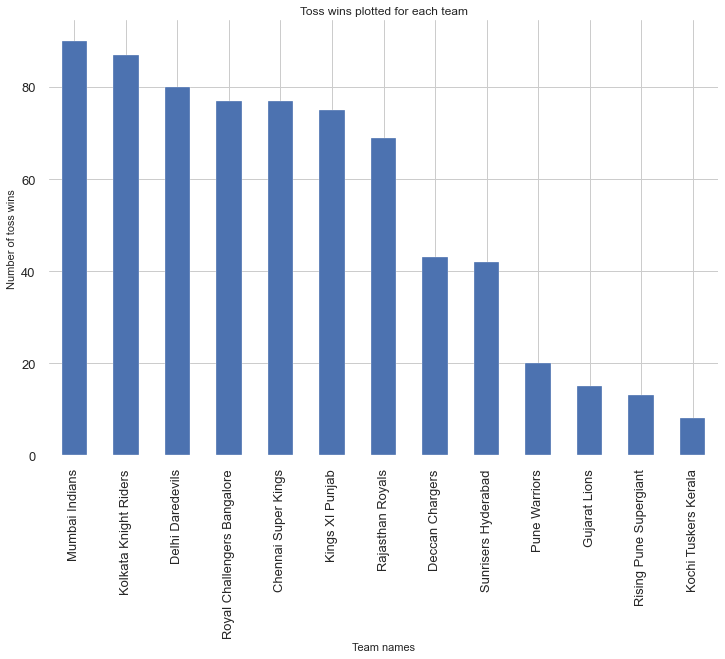

In [25]:
matches.groupby(['toss_winner']).count()['match_id'].sort_values(ascending=False).plot(kind='bar', figsize=(12,8), fontsize=13, color='b')
plt.grid(True)
plt.ylabel('Number of toss wins')
plt.xlabel('Team names')
plt.title("Toss wins plotted for each team")
plt.show()

Text(0, 0.5, '% of times the teams won the match after winning the toss')

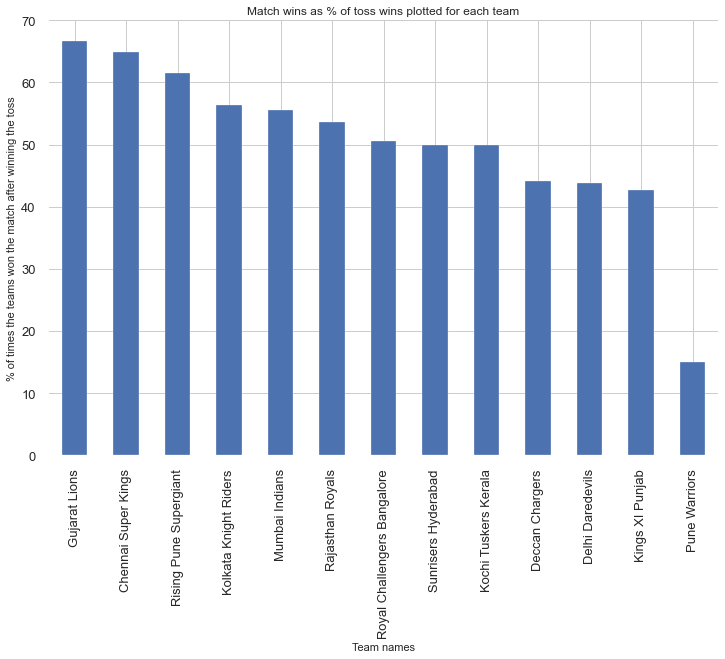

In [26]:
x = matches[matches.toss_winner==matches.winner].groupby(['toss_winner']).count()['match_id']*100/matches.groupby(['toss_winner']).count()['match_id']
x.sort_values(ascending = False).plot(kind='bar',figsize=(12,8), fontsize=13, color='b')
plt.grid(True)
plt.xlabel('Team names')
plt.title("Match wins as % of toss wins plotted for each team")
plt.ylabel('% of times the teams won the match after winning the toss')

From the above charts it is quite evident that **RCB is in top 4 teams to win the toss** but **they are not even in top 6 team to win the match once toss is won**. On contrast the best teams which have won most IPLs, MI,CSK and KKR are in the top 5 making the right decision once toss is won. 

<a id=section50102></a>
### 5.1.2 Does venue affect the results?

In [27]:
home = []
away = []
#RCB home
x = len(matches[(matches.winner == 'Royal Challengers Bangalore')&(matches.city=='Bengaluru')])*100/len(matches[(matches.city=='Bengaluru')&((matches.team1=='Royal Challengers Bangalore')|(matches.team2=='Royal Challengers Bangalore'))])
home.append(x)
#RCB away
x = len(matches[(matches.winner == 'Royal Challengers Bangalore')&(matches.city!='Bengaluru')])*100/len(matches[(matches.city!='Bengaluru')&((matches.team1=='Royal Challengers Bangalore')|(matches.team2=='Royal Challengers Bangalore'))])
away.append(x)
#CSK home
x = len(matches[(matches.winner == 'Chennai Super Kings')&(matches.city=='Chennai')])*100/len(matches[(matches.city=='Chennai')&((matches.team1=='Chennai Super Kings')|(matches.team2=='Chennai Super Kings'))])
home.append(x)
#CSK away
x = len(matches[(matches.winner == 'Chennai Super Kings')&(matches.city!='Chennai')])*100/len(matches[(matches.city!='Chennai')&((matches.team1=='Chennai Super Kings')|(matches.team2=='Chennai Super Kings'))])
away.append(x)
#KKR home
x = len(matches[(matches.winner == 'Kolkata Knight Riders')&(matches.city=='Kolkata')])*100/len(matches[(matches.city=='Kolkata')&((matches.team1=='Kolkata Knight Riders')|(matches.team2=='Kolkata Knight Riders'))])
home.append(x)
#KKR away
x = len(matches[(matches.winner == 'Kolkata Knight Riders')&(matches.city!='Kolkata')])*100/len(matches[(matches.city!='Kolkata')&((matches.team1=='Kolkata Knight Riders')|(matches.team2=='Kolkata Knight Riders'))])
away.append(x)
#MI home
x = len(matches[(matches.winner == 'Mumbai Indians')&(matches.city=='Mumbai')])*100/len(matches[(matches.city=='Mumbai')&((matches.team1=='Mumbai Indians')|(matches.team2=='Mumbai Indians'))])
home.append(x)
#MI away
x = len(matches[(matches.winner == 'Mumbai Indians')&(matches.city!='Mumbai')])*100/len(matches[(matches.city!='Mumbai')&((matches.team1=='Mumbai Indians')|(matches.team2=='Mumbai Indians'))])
away.append(x)

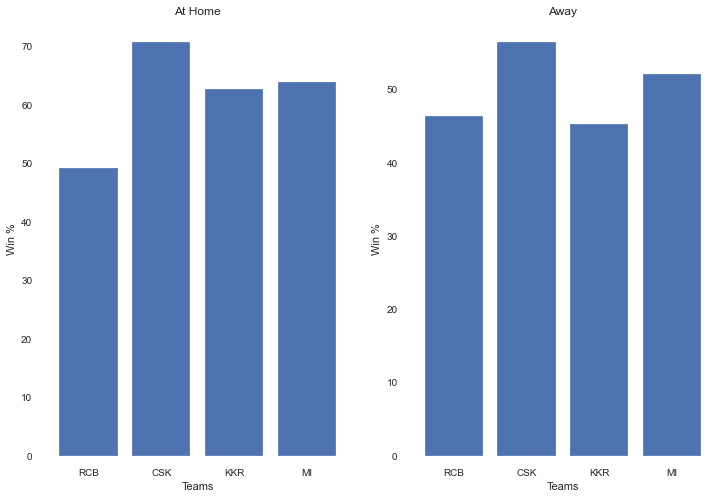

In [28]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(1,2, figsize=(12,8))
import numpy as np
x = ['RCB', 'CSK', 'KKR', 'MI']
a[0].bar(x,home)
a[0].set_title('At Home')
a[0].set_xlabel('Teams')
a[0].set_ylabel('Win %')
a[1].bar(x,away)
a[1].set_title('Away')
a[1].set_xlabel('Teams')
a[1].set_ylabel('Win %')
plt.show()

Every season 50% of the matches are at home ground. One gets to prepare the pitch according to their liking, set boundaries according to their liking, play with their home crowd cheering, i.e. most ideal conditions for any team. RCB has not been able to encash their home conditions like other top teams and have a dismal performance of victory % less than 50 at home ground.
Their performance is no better at away grounds. With both the % being less than 50%, RCB has always struggled to qualify to playoffs.

<a id=section502></a>
## 5.2 Analyse how pressure affects RCB

<a id=section50201></a>
### 5.2.1 How have RCB fared in high score chasing games?

In [29]:
#Caculated the scores of first batting team when RCB is bowling
scores = deliveries[(deliveries.bowling_team=='Royal Challengers Bangalore')&(deliveries.inning==1)].groupby(['match_id']).sum()['total_runs']
#Get the match_id of those matches where the team has scored greater than 170 runs
indices = scores[scores>170].index
#Get the df having the match id and the winner for those matches (PS - index shifted by 1 bec of the bw index and match_id)
rcb_hc_df = matches.loc[(indices-1),["match_id","winner"]]
#Find the length of df of total high chasing matches played by RCB
rcb_hc_matches = len(rcb_hc_df)
#Find the length of df where RCB has emerged victorious chasing such high total
rcb_hc_victories = len(rcb_hc_df[rcb_hc_df.winner=='Royal Challengers Bangalore'])

#Caculated the scores of first batting team when CSK is bowling
scores = deliveries[(deliveries.bowling_team=='Chennai Super Kings')&(deliveries.inning==1)].groupby(['match_id']).sum()['total_runs']
#Get the match_id of those matches where the team has scored greater than 170 runs
indices = scores[scores>170].index
#Get the df having the match id and the winner for those matches (PS - index shifted by 1 bec of the bw index and match_id)
csk_hc_df = matches.loc[(indices-1),["match_id","winner"]]
#Find the length of df of total high chasing matches played by CSK
csk_hc_matches = len(csk_hc_df)
#Find the length of df where CSK has emerged victorious chasing such high total
csk_hc_victories = len(csk_hc_df[csk_hc_df.winner=='Chennai Super Kings'])

#Caculated the scores of first batting team when KKR is bowling
scores = deliveries[(deliveries.bowling_team=='Kolkata Knight Riders')&(deliveries.inning==1)].groupby(['match_id']).sum()['total_runs']
#Get the match_id of those matches where the team has scored greater than 170 runs
indices = scores[scores>170].index
#Get the df having the match id and the winner for those matches (PS - index shifted by 1 bec of the bw index and match_id)
kkr_hc_df = matches.loc[(indices-1),["match_id","winner"]]
#Find the length of df of total high chasing matches played by KKR
kkr_hc_matches = len(kkr_hc_df)
#Find the length of df where CSK has emerged victorious chasing such high total
kkr_hc_victories = len(kkr_hc_df[kkr_hc_df.winner=='Kolkata Knight Riders'])

#Caculated the scores of first batting team when MI is bowling
scores = deliveries[(deliveries.bowling_team=='Mumbai Indians')&(deliveries.inning==1)].groupby(['match_id']).sum()['total_runs']
#Get the match_id of those matches where the team has scored greater than 170 runs
indices = scores[scores>170].index
#Get the df having the match id and the winner for those matches (PS - index shifted by 1 bec of the bw index and match_id)
mi_hc_df = matches.loc[(indices-1),["match_id","winner"]]
#Find the length of df of total high chasing matches played by KKR
mi_hc_matches = len(mi_hc_df)
#Find the length of df where MI has emerged victorious chasing such high total
mi_hc_victories = len(mi_hc_df[mi_hc_df.winner=='Mumbai Indians'])

Text(0.5, 1.0, 'Number of high chasing matches vs wins')

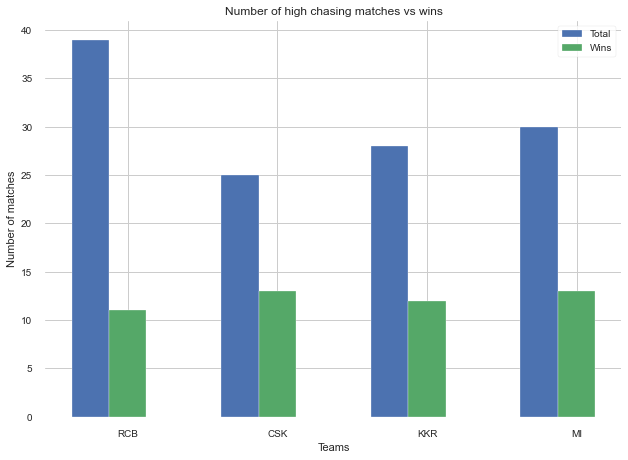

In [30]:
data = [[rcb_hc_matches, csk_hc_matches, kkr_hc_matches, mi_hc_matches],
[rcb_hc_victories, csk_hc_victories, kkr_hc_victories, mi_hc_victories]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.grid(True)
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.legend(labels=['Total', 'Wins'])
ax.set_xticks([0.25,1.25,2.25,3.25])
ax.set_xticklabels(["RCB", "CSK", "KKR", "MI"])
ax.set_ylabel('Number of matches')
ax.set_xlabel('Teams')
ax.set_title('Number of high chasing matches vs wins')

RCB has won 11 out of 40 high chasing matches. That is about 28% win rate.
CSK has about 52% win rate, KKR has about 42% win rate and MI has about 43% win rate.
This says a lot about RCB conceding greater than 170 runs in more matches than other successful teams, and also about how their win% in such situations is lesser than other teams.

<a id=section50202></a>
### 5.2.2 How have RCB fared in low score defending games?

In [31]:
#Caculated the scores of first innings when RCB is batting
scores = deliveries[(deliveries.batting_team=='Royal Challengers Bangalore')&(deliveries.inning==1)].groupby(['match_id']).sum()['total_runs']
#Get the match_id of those matches where the team has scored less than 140 runs
indices = scores[scores<140].index
#Get the df having the match id and the winner for those matches (PS - index shifted by 1 bec of the bw index and match_id)
rcb_ld_df = matches.loc[(indices-1),["match_id","winner"]]
#Find the length of df of total low score defending matches played by RCB
rcb_ld_matches = len(rcb_ld_df)
#Find the length of df where RCB has emerged victorious defending such total
rcb_ld_victories = len(rcb_ld_df[rcb_ld_df.winner=='Royal Challengers Bangalore'])

#Caculated the scores of first innings when CSK is batting
scores = deliveries[(deliveries.batting_team=='Chennai Super Kings')&(deliveries.inning==1)].groupby(['match_id']).sum()['total_runs']
#Get the match_id of those matches where the team has scored less than 140 runs
indices = scores[scores<130].index
#Get the df having the match id and the winner for those matches (PS - index shifted by 1 bec of the bw index and match_id)
csk_ld_df = matches.loc[(indices-1),["match_id","winner"]]
#Find the length of df of total low score defending matches played by CSK
csk_ld_matches = len(csk_ld_df)
#Find the length of df where CSK has emerged victorious defending such total
csk_ld_victories = len(csk_ld_df[csk_ld_df.winner=='Chennai Super Kings'])

#Caculated the scores of first innings when KKR is batting
scores = deliveries[(deliveries.batting_team=='Kolkata Knight Riders')&(deliveries.inning==1)].groupby(['match_id']).sum()['total_runs']
#Get the match_id of those matches where the team has scored less than 140 runs
indices = scores[scores<130].index
#Get the df having the match id and the winner for those matches (PS - index shifted by 1 bec of the bw index and match_id)
kkr_ld_df = matches.loc[(indices-1),["match_id","winner"]]
#Find the length of df of total low score defending matches played by KKR
kkr_ld_matches = len(kkr_ld_df)
#Find the length of df where KKR has emerged victorious defending such total
kkr_ld_victories = len(kkr_ld_df[kkr_ld_df.winner=='Kolkata Knight Riders'])

#Caculated the scores of first innings when MI is batting
scores = deliveries[(deliveries.batting_team=='Mumbai Indians')&(deliveries.inning==1)].groupby(['match_id']).sum()['total_runs']
#Get the match_id of those matches where the team has scored less than 140 runs
indices = scores[scores<130].index
#Get the df having the match id and the winner for those matches (PS - index shifted by 1 bec of the bw index and match_id)
mi_ld_df = matches.loc[(indices-1),["match_id","winner"]]
#Find the length of df of total low score defending matches played by MI
mi_ld_matches = len(mi_ld_df)
#Find the length of df where MI has emerged victorious defending such total
mi_ld_victories = len(mi_ld_df[mi_ld_df.winner=='Mumbai Indians'])

Text(0.5, 1.0, 'Number of low score matches vs wins')

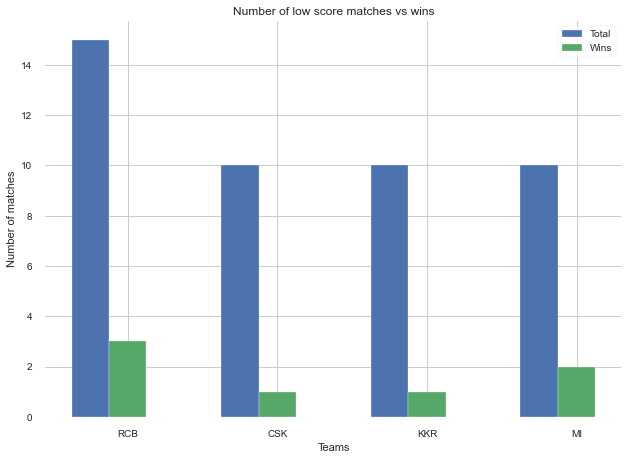

In [32]:
data = [[rcb_ld_matches, csk_ld_matches, kkr_ld_matches, mi_ld_matches],
[rcb_ld_victories, csk_ld_victories, kkr_ld_victories, mi_ld_victories]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.grid(True)
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.legend(labels=['Total', 'Wins'])
ax.set_xticks([0.25,1.25,2.25,3.25])
ax.set_xticklabels(["RCB", "CSK", "KKR", "MI"])
ax.set_ylabel('Number of matches')
ax.set_xlabel('Teams')
ax.set_title('Number of low score matches vs wins')

RCB has succesfully defended 3 out of 15 low scoring matches. That is about 20% win rate.
CSK has about 10% win rate, KKR has about 10% win rate and MI has about 20% win rate.
Though their win % is equal to or better than all other successful, it says a lot about RCB scoring lesser than 140 runs in 50% more matches than other successful teams. But they have fared decently well in defending low score i.e. in one of the pressure situations.

<a id=section50203></a>
### 5.2.3 How have RCB performed in nail-biting finishes?

In [33]:
#Have defined nail biting finish as win_by_runs<=10 or win_by_wickets<=2
#total nail biting matches of RCB
rcb_nb_matches = len(matches[((matches.team1=='Royal Challengers Bangalore') | (matches.team2=='Royal Challengers Bangalore'))& (((matches.win_by_runs<=10) & (matches.win_by_runs!=0))|((matches.win_by_wickets<=2)&(matches.win_by_wickets!=0)))])
#victories of nail biting matches of RCB
rcb_nb_victories = len(matches[(matches.winner=='Royal Challengers Bangalore')& (((matches.win_by_runs<=10) & (matches.win_by_runs!=0))|((matches.win_by_wickets<=2)&(matches.win_by_wickets!=0)))])

#total nail biting matches of CSK
csk_nb_matches = len(matches[((matches.team1=='Chennai Super Kings') | (matches.team2=='Chennai Super Kings'))& (((matches.win_by_runs<=10) & (matches.win_by_runs!=0))|((matches.win_by_wickets<=2)&(matches.win_by_wickets!=0)))])
#victories of nail biting matches of CSK
csk_nb_victories = len(matches[(matches.winner=='Chennai Super Kings')& (((matches.win_by_runs<=10) & (matches.win_by_runs!=0))|((matches.win_by_wickets<=2)&(matches.win_by_wickets!=0)))])

#total nail biting matches of KKR
kkr_nb_matches = len(matches[((matches.team1=='Kolkata Knight Riders') | (matches.team2=='Kolkata Knight Riders'))& (((matches.win_by_runs<=10) & (matches.win_by_runs!=0))|((matches.win_by_wickets<=2)&(matches.win_by_wickets!=0)))])
#victories of nail biting matches of KKR
kkr_nb_victories = len(matches[(matches.winner=='Kolkata Knight Riders')& (((matches.win_by_runs<=10) & (matches.win_by_runs!=0))|((matches.win_by_wickets<=2)&(matches.win_by_wickets!=0)))])

#total nail biting matches of MI
mi_nb_matches = len(matches[((matches.team1=='Mumbai Indians') | (matches.team2=='Mumbai Indians'))& (((matches.win_by_runs<=10) & (matches.win_by_runs!=0))|((matches.win_by_wickets<=2)&(matches.win_by_wickets!=0)))])
#victories of nail biting matches of MI
mi_nb_victories = len(matches[(matches.winner=='Mumbai Indians')& (((matches.win_by_runs<=10) & (matches.win_by_runs!=0))|((matches.win_by_wickets<=2)&(matches.win_by_wickets!=0)))])

Text(0.5, 1.0, 'Number of nail biting matches vs wins')

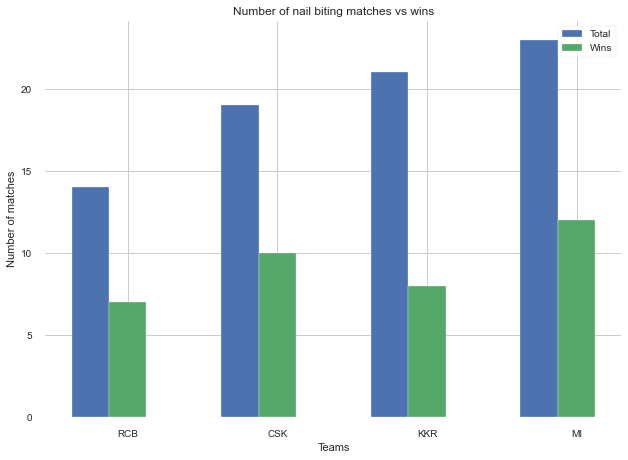

In [34]:
data = [[rcb_nb_matches, csk_nb_matches, kkr_nb_matches, mi_nb_matches],
[rcb_nb_victories, csk_nb_victories, kkr_nb_victories, mi_nb_victories]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.grid(True)
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.legend(labels=['Total', 'Wins'])
ax.set_xticks([0.25,1.25,2.25,3.25])
ax.set_xticklabels(["RCB", "CSK", "KKR", "MI"])
ax.set_ylabel('Number of matches')
ax.set_xlabel('Teams')
ax.set_title('Number of nail biting matches vs wins')

RCB has won 7 out of 14 nail biting matches. That is about 50% win rate which is better than KKR(8/21 - 38%) but less than the top 2 teams i.e. CSK (10/19 - 53%) and MI (12/23 - 52%). 

<a id=section50204></a>
### 5.2.4 How have RCB performed in superovers?

In [35]:
#Have defined nail biting finish as win_by_runs<=10 or win_by_wickets<=2
#total super over matches of RCB
rcb_so_matches = len(ipl_data[(ipl_data.result=='tie')&((ipl_data.team1=='Royal Challengers Bangalore') | (ipl_data.team2=='Royal Challengers Bangalore'))].groupby(['winner']).count())
#victories of super over matches of RCB
rcb_so_victories = len(ipl_data[(ipl_data.result=='tie')&(ipl_data.winner=='Royal Challengers Bangalore')].groupby(['winner']).count())

#total super over matches of CSK
csk_so_matches = len(ipl_data[(ipl_data.result=='tie')&((ipl_data.team1=='Chennai Super Kings') | (ipl_data.team2=='Chennai Super Kings'))].groupby(['winner']).count())
#victories of super over matches of CSK
csk_so_victories = len(ipl_data[(ipl_data.result=='tie')&(ipl_data.winner=='Chennai Super Kings')].groupby(['winner']).count())

#total super over matches of KKR
kkr_so_matches = len(ipl_data[(ipl_data.result=='tie')&((ipl_data.team1=='Kolkata Knight Riders') | (ipl_data.team2=='Chennai Super Kings'))].groupby(['winner']).count())
#victories of super over matches of KKR
kkr_so_victories = len(ipl_data[(ipl_data.result=='tie')&(ipl_data.winner=='Kolkata Knight Riders')].groupby(['winner']).count())

#total super over matches of MI
mi_so_matches = len(ipl_data[(ipl_data.result=='tie')&((ipl_data.team1=='Mumbai Indians') | (ipl_data.team2=='Mumbai Indians'))].groupby(['winner']).count())
#victories of super over matches of MI
mi_so_victories = len(ipl_data[(ipl_data.result=='tie')&(ipl_data.winner=='Mumbai Indians')].groupby(['winner']).count())

Text(0.5, 1.0, 'Number of super over matches vs wins')

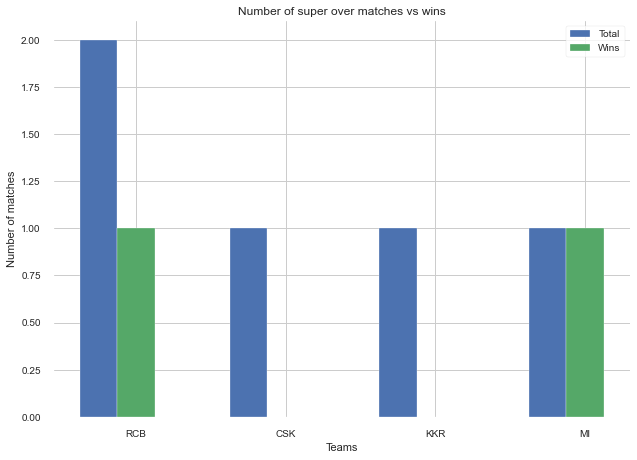

In [36]:
data = [[rcb_so_matches, csk_so_matches, kkr_so_matches, mi_so_matches],
[rcb_so_victories, csk_so_victories, kkr_so_victories, mi_so_victories]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.grid(True)
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.legend(labels=['Total', 'Wins'])
ax.set_xticks([0.25,1.25,2.25,3.25])
ax.set_xticklabels(["RCB", "CSK", "KKR", "MI"])
ax.set_ylabel('Number of matches')
ax.set_xlabel('Teams')
ax.set_title('Number of super over matches vs wins')

With very less matches played by each team, it is difficult to compare or find patterns. Also, there is no proof that RCB's performance is bad in super overs.

<a id=section50205></a>
### 5.2.5 How has RCB performed in playoffs and finale matches?

In [37]:
playoff_match_count = [3,3,4,4,4,4,4,4,4,4,4]

In [38]:
#Get all playoff matches in a dataframe
matches_df = pd.DataFrame()
i=0
for season_id in np.sort(matches.season.unique()):
    temp = matches[matches.season==season_id].iloc[-playoff_match_count[i]:,]
    #print(temp)
    i=i+1
    matches_df = matches_df.append(temp)

matches_df.reset_index(inplace = True) 
#Filter RCB matches
rcb_po_matches = len(matches_df[(matches_df.team1=='Royal Challengers Bangalore') | (matches_df.team2=='Royal Challengers Bangalore')])
rcb_po_victories = len(matches_df[(matches_df.winner=='Royal Challengers Bangalore')])

#Filter CSK matches
csk_po_matches = len(matches_df[(matches_df.team1=='Chennai Super Kings') | (matches_df.team2=='Chennai Super Kings')])
csk_po_victories = len(matches_df[(matches_df.winner=='Chennai Super Kings')])
                                                                             
#Filter KKR matches 
kkr_po_matches = len(matches_df[(matches_df.team1=="Kolkata Knight Riders") | (matches_df.team2=='Kolkata Knight Riders')])
kkr_po_victories = len(matches_df[(matches_df.winner=='Kolkata Knight Riders')])

#Filter MI matches
mi_po_matches = len(matches_df[(matches_df.team1=='Mumbai Indians') | (matches_df.team2=='Mumbai Indians')])
mi_po_victories = len(matches_df[(matches_df.winner=='Mumbai Indians')])

In [39]:
#Get all final matches in a dataframe
matches_df = pd.DataFrame()
for season_id in np.sort(matches.season.unique()):
    temp = matches[matches.season==season_id].iloc[-1:,]
    matches_df = matches_df.append(temp)
    
#Filter RCB matches
rcb_fi_matches = len(matches_df[(matches_df.team1=='Royal Challengers Bangalore') | (matches_df.team2=='Royal Challengers Bangalore')])
rcb_fi_victories = len(matches_df[(matches_df.winner=='Royal Challengers Bangalore')])

#Filter CSK matches
csk_fi_matches = len(matches_df[(matches_df.team1=='Chennai Super Kings') | (matches_df.team2=='Chennai Super Kings')])
csk_fi_victories = len(matches_df[(matches_df.winner=='Chennai Super Kings')])
                                                                             
#Filter KKR matches 
kkr_fi_matches = len(matches_df[(matches_df.team1=="Kolkata Knight Riders") | (matches_df.team2=='Kolkata Knight Riders')])
kkr_fi_victories = len(matches_df[(matches_df.winner=='Kolkata Knight Riders')])

#Filter MI matches
mi_fi_matches = len(matches_df[(matches_df.team1=='Mumbai Indians') | (matches_df.team2=='Mumbai Indians')])
mi_fi_victories = len(matches_df[(matches_df.winner=='Mumbai Indians')])

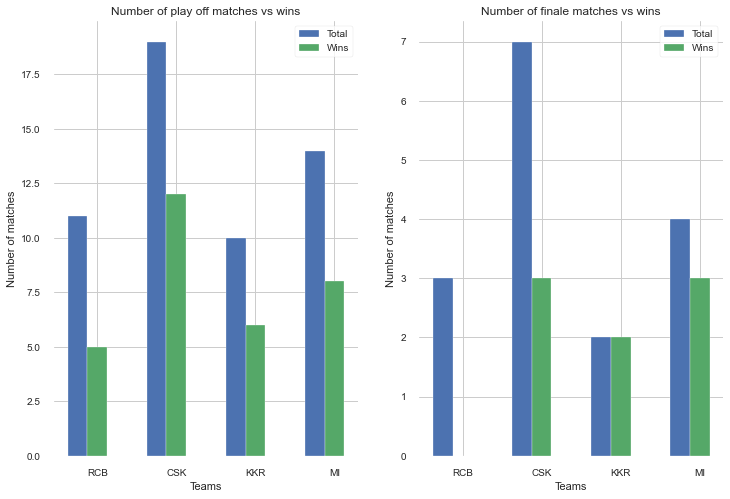

In [40]:
data_po = [[rcb_po_matches, csk_po_matches, kkr_po_matches, mi_po_matches],
[rcb_po_victories, csk_po_victories, kkr_po_victories, mi_po_victories]]
data_fi = [[rcb_fi_matches, csk_fi_matches, kkr_fi_matches, mi_fi_matches],
[rcb_fi_victories, csk_fi_victories, kkr_fi_victories, mi_fi_victories]]
X = np.arange(4)
fig,ax =  plt.subplots(1,2, figsize=(12,8))
ax[0].grid(True)
ax[0].bar(X + 0.00, data_po[0], color = 'b', width = 0.25)
ax[0].bar(X + 0.25, data_po[1], color = 'g', width = 0.25)
ax[0].legend(labels=['Total', 'Wins'])
ax[0].set_xticks([0.25,1.25,2.25,3.25])
ax[0].set_xticklabels(["RCB", "CSK", "KKR", "MI"])
ax[0].set_ylabel('Number of matches')
ax[0].set_xlabel('Teams')
ax[0].set_title('Number of play off matches vs wins')
ax[1].grid(True)
ax[1].bar(X + 0.00, data_fi[0], color = 'b', width = 0.25)
ax[1].bar(X + 0.25, data_fi[1], color = 'g', width = 0.25)
ax[1].legend(labels=['Total', 'Wins'])
ax[1].set_xticks([0.25,1.25,2.25,3.25])
ax[1].set_xticklabels(["RCB", "CSK", "KKR", "MI"])
ax[1].set_ylabel('Number of matches')
ax[1].set_xlabel('Teams')
ax[1].set_title('Number of finale matches vs wins')
plt.show()

**Playoffs** <br>
RCB has won 5 out of 11 playoff matches. That is about 45% win rate which is worse than all 3 successful teams.
KKR(6/10 - 60%), CSK (12/19 - 63%) and MI (8/14 - 57%). 

**Finale**<br>
RCB has won 0 out of 3 finale matches. Having played well in the entire series to reach the final, the team was not able to seal the title due to dismal performance in finale.
The rest of the successful teams ensured that they are not outperformed in the finale with the following win percentages.
KKR(2/2 - 100%), CSK (3/7 - 42%) and MI (3/4 - 75%). 

<a id=section503></a>
## 5.3 Analyze how is RCB's batting

<a id=section50301></a>
### 5.3.1 How many players from each team contribute more than 20 runs in a match?

In [41]:
#RCB
#Extract the batsman_runs for each player
runs = deliveries[deliveries.batting_team=='Royal Challengers Bangalore'].groupby(['match_id','batsman']).sum().batsman_runs
#Get the list of batsman who scored greater than 20 in each match
df = pd.DataFrame(runs[runs>20])
df.reset_index(inplace=True)
#Count the % of matches in which more than 2 batsman have contributed 20+ runs
temp = df.groupby(['match_id']).count().batsman
percentage_rcb = len(temp[temp>2])*100/len(temp)

#CSK
#Extract the batsman_runs for each player
runs = deliveries[deliveries.batting_team=='Chennai Super Kings'].groupby(['match_id','batsman']).sum().batsman_runs
#Get the list of batsman who scored greater than 20 in each match
df = pd.DataFrame(runs[runs>20])
df.reset_index(inplace=True)
#Count the % of matches in which more than 2 batsman have contributed 20+ runs
temp = df.groupby(['match_id']).count().batsman
percentage_csk = len(temp[temp>2])*100/len(temp)

#KKR
#Extract the batsman_runs for each player
runs = deliveries[deliveries.batting_team=='Kolkata Knight Riders'].groupby(['match_id','batsman']).sum().batsman_runs
#Get the list of batsman who scored greater than 20 in each match
df = pd.DataFrame(runs[runs>20])
df.reset_index(inplace=True)
#Count the % of matches in which more than 2 batsman have contributed 20+ runs
temp = df.groupby(['match_id']).count().batsman
percentage_kkr = len(temp[temp>2])*100/len(temp)

#MI
#Extract the batsman_runs for each player
runs = deliveries[deliveries.batting_team=='Mumbai Indians'].groupby(['match_id','batsman']).sum().batsman_runs
#Get the list of batsman who scored greater than 20 in each match
df = pd.DataFrame(runs[runs>20])
df.reset_index(inplace=True)
#Count the % of matches in which more than 2 batsman have contributed 20+ runs
temp = df.groupby(['match_id']).count().batsman
percentage_mi = len(temp[temp>2])*100/len(temp)

[percentage_rcb, percentage_csk, percentage_kkr, percentage_mi]

[50.31055900621118, 69.38775510204081, 51.533742331288344, 59.76331360946745]

Text(0.5, 1.0, 'MI - % of matches >2 players scored 20+')

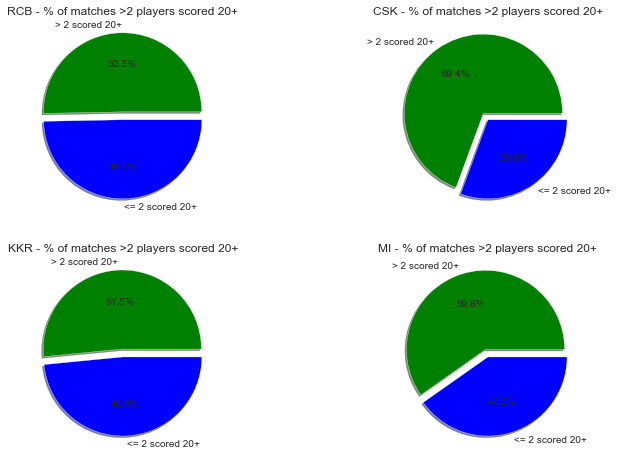

In [42]:
fig,ax = plt.subplots(2,2, figsize=(12,8))
label = ['> 2 scored 20+', '<= 2 scored 20+']
colors = ['green', 'blue']
explode = (0.1,0)
rcb_per = [percentage_rcb, 100-percentage_rcb]
ax[0][0].pie(rcb_per, labels = label, colors= colors, explode = explode,autopct='%1.1f%%', shadow= True)
ax[0][0].set_title('RCB - % of matches >2 players scored 20+')

csk_per = [percentage_csk, 100-percentage_csk]
ax[0][1].pie(csk_per, labels = label, colors= colors, explode = explode,autopct='%1.1f%%', shadow= True)
ax[0][1].set_title('CSK - % of matches >2 players scored 20+')

kkr_per = [percentage_kkr, 100-percentage_kkr]
ax[1][0].pie(kkr_per, labels = label, colors= colors, explode = explode,autopct='%1.1f%%', shadow= True)
ax[1][0].set_title('KKR - % of matches >2 players scored 20+')

mi_per = [percentage_mi, 100-percentage_mi]
ax[1][1].pie(mi_per, labels = label, colors= colors, explode = explode,autopct='%1.1f%%', shadow= True)
ax[1][1].set_title('MI - % of matches >2 players scored 20+')


According to the above graphs, for RCB in about 50% of matches, not more than 3 players have contributed 20+ runs. This puts a lot of pressure on few of the batsman in the team. KKR is only marginally better than RCB, but MI and CSK have more players contributing in ~60%  and ~70% of matches.

<a id=section50302></a>
### 5.3.2 How many players from each team contribute more than 300 runs in a season?

In [43]:
#Extract the season_wise score for each player
runs = ipl_data[ipl_data.batting_team=='Royal Challengers Bangalore'].groupby(['season', 'batsman']).sum().batsman_runs
#Get the list of batsman who scored greater than 300 in each season
df = pd.DataFrame(runs[runs>300])
df.reset_index(inplace=True)
#Count the No of players who have scored more than 300 runs in each season
rcb = df.groupby(['season']).count().batsman_runs


#Extract the season_wise score for each player
runs = ipl_data[ipl_data.batting_team=='Chennai Super Kings'].groupby(['season', 'batsman']).sum().batsman_runs
#Get the list of batsman who scored greater than 300 in each season
df = pd.DataFrame(runs[runs>300])
df.reset_index(inplace=True)
#Count the No of players who have scored more than 300 runs in each season
csk = df.groupby(['season']).count().batsman_runs

#Extract the season_wise score for each player
runs = ipl_data[ipl_data.batting_team=='Kolkata Knight Riders'].groupby(['season', 'batsman']).sum().batsman_runs
#Get the list of batsman who scored greater than 300 in each season
df = pd.DataFrame(runs[runs>300])
df.reset_index(inplace=True)
#Count the No of players who have scored more than 300 runs in each season
kkr = df.groupby(['season']).count().batsman_runs

#Extract the season_wise score for each player
runs = ipl_data[ipl_data.batting_team=='Mumbai Indians'].groupby(['season', 'batsman']).sum().batsman_runs
#Get the list of batsman who scored greater than 300 in each season
df = pd.DataFrame(runs[runs>300])
df.reset_index(inplace=True)
#Count the No of players who have scored more than 300 runs in each season
mi = df.groupby(['season']).count().batsman_runs

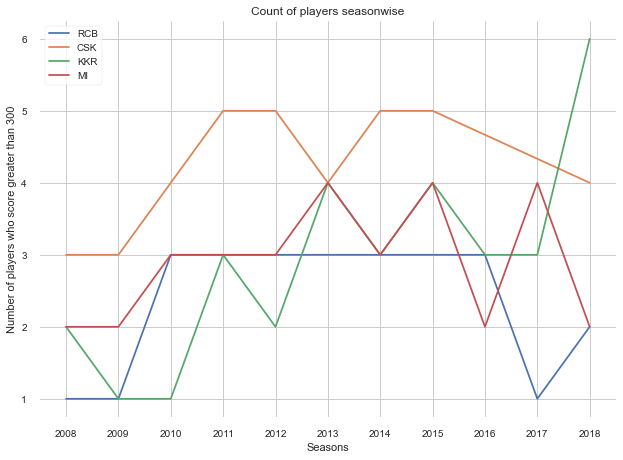

In [44]:
years = list(np.arange(2008,2019,1))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1]) # main axes
x1 = list(rcb.index.values)
y1 = list(rcb.values)
x2 = list(csk.index.values)
y2 = list(csk.values)
x3 = list(kkr.index.values)
y3 = list(kkr.values)
x4 = list(mi.index.values)
y4 = list(mi.values)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
ax.set_ylabel('Number of players who score greater than 300')
ax.set_xlabel('Seasons')
ax.set_title('Count of players seasonwise')
plt.legend(labels=['RCB', 'CSK', 'KKR', 'MI'])
ax.set_xticks(years)
ax.grid(True)

On an average, RCB is atmost at par or worse as compared to other successful teams. This means there are only few players contributing in the entire season.

<a id=section50305></a>
### 5.3.5 How is the lower middle order for RCB?

In [45]:
#RCB runs
#Filtering the respective team
df = deliveries[deliveries.batting_team=='Royal Challengers Bangalore']

#Need to get individual balls of each batsman according to their playing position, hence sort = False
groups = df.groupby(['match_id','batsman'], sort=False).count()['ball']

#Can drop the index 'batsman' as only the balls in each position matters and not the batsman
temp = groups.droplevel(level=1)

#reset the index to get the match_ids and balls
temp2 = temp.reset_index(drop=False)

#Place them into a new data frame with positional balls
i=0
list_ids=temp2.match_id.unique()
batsman_list = []
batsman_list.append(list_ids[i])
batsmen= pd.DataFrame()
for index, row in temp2.iterrows():
    if row['match_id']==list_ids[i]:
        batsman_list.append(row['ball'])
    else:
        i = i+1
        a_series = pd.Series(batsman_list)
        batsmen = batsmen.append(a_series, ignore_index=True)
        batsman_list = []
        batsman_list.append(list_ids[i])
        batsman_list.append(row['ball'])
        
a_series = pd.Series(batsman_list)
batsmen = batsmen.append(a_series, ignore_index=True)
batsmen.rename(columns={0:"match_id"}, inplace= True)
rcb_positional_balls = batsmen

In [46]:
#RCB balls
#Filtering the respective team
df = deliveries[deliveries.batting_team=='Royal Challengers Bangalore']

#Need to get individual runs of each batsman according to their playing position, hence sort = False
groups = df.groupby(['match_id','batsman'], sort=False).sum()['batsman_runs']

#Can drop the index 'batsman' as only the score in each position matters and not the batsman
temp = groups.droplevel(level=1)

#reset the index to get the match_ids and scores
temp2 = temp.reset_index(drop=False)

#Place them into a new data frame with positional scores
i=0
list_ids=temp2.match_id.unique()
batsman_list = []
batsman_list.append(list_ids[i])
batsmen= pd.DataFrame()
for index, row in temp2.iterrows():
    if row['match_id']==list_ids[i]:
        batsman_list.append(row['batsman_runs'])
    else:
        i = i+1
        a_series = pd.Series(batsman_list)
        batsmen = batsmen.append(a_series, ignore_index=True)
        batsman_list = []
        batsman_list.append(list_ids[i])
        batsman_list.append(row['batsman_runs'])
        
a_series = pd.Series(batsman_list)
batsmen = batsmen.append(a_series, ignore_index=True)
batsmen.rename(columns={0:"match_id"}, inplace= True)

rcb_positional_runs = batsmen
#Get the strike rate of each batsman. runs score by balls
rcb = rcb_positional_runs*100/rcb_positional_balls

#as we are interested in lower middle order batsmen, drop other positions (Middle order is 4,5,6,7)
rcb.drop(['match_id',1, 2, 3,4, 8,9,10,11], axis=1, inplace=True)


In [47]:
#CSK runs
#Filtering the respective team
df = deliveries[deliveries.batting_team=='Chennai Super Kings']

#Need to get individual balls of each batsman according to their playing position, hence sort = False
groups = df.groupby(['match_id','batsman'], sort=False).count()['ball']

#Can drop the index 'batsman' as only the balls in each position matters and not the batsman
temp = groups.droplevel(level=1)

#reset the index to get the match_ids and balls
temp2 = temp.reset_index(drop=False)

#Place them into a new data frame with positional balls
i=0
list_ids=temp2.match_id.unique()
batsman_list = []
batsman_list.append(list_ids[i])
batsmen= pd.DataFrame()
for index, row in temp2.iterrows():
    if row['match_id']==list_ids[i]:
        batsman_list.append(row['ball'])
    else:
        i = i+1
        a_series = pd.Series(batsman_list)
        batsmen = batsmen.append(a_series, ignore_index=True)
        batsman_list = []
        batsman_list.append(list_ids[i])
        batsman_list.append(row['ball'])
        
a_series = pd.Series(batsman_list)
batsmen = batsmen.append(a_series, ignore_index=True)
batsmen.rename(columns={0:"match_id"}, inplace= True)
csk_positional_balls = batsmen

In [48]:
#CSK balls
#Filtering the respective team
df = deliveries[deliveries.batting_team=='Chennai Super Kings']

#Need to get individual runs of each batsman according to their playing position, hence sort = False
groups = df.groupby(['match_id','batsman'], sort=False).sum()['batsman_runs']

#Can drop the index 'batsman' as only the score in each position matters and not the batsman
temp = groups.droplevel(level=1)

#reset the index to get the match_ids and scores
temp2 = temp.reset_index(drop=False)

#Place them into a new data frame with positional scores
i=0
list_ids=temp2.match_id.unique()
batsman_list = []
batsman_list.append(list_ids[i])
batsmen= pd.DataFrame()
for index, row in temp2.iterrows():
    if row['match_id']==list_ids[i]:
        batsman_list.append(row['batsman_runs'])
    else:
        i = i+1
        a_series = pd.Series(batsman_list)
        batsmen = batsmen.append(a_series, ignore_index=True)
        batsman_list = []
        batsman_list.append(list_ids[i])
        batsman_list.append(row['batsman_runs'])
        
a_series = pd.Series(batsman_list)
batsmen = batsmen.append(a_series, ignore_index=True)
batsmen.rename(columns={0:"match_id"}, inplace= True)

csk_positional_runs = batsmen

#Get the strike rate of each batsman. runs score by balls
csk = csk_positional_runs*100/csk_positional_balls

#as we are interested in lower middle order batsmen, drop other positions (Middle order is 4,5,6,7)
csk.drop(['match_id',1, 2, 3, 4, 8,9,10,11], axis=1, inplace=True)


In [49]:
#MI runs
#Filtering the respective team
df = deliveries[deliveries.batting_team=='Mumbai Indians']

#Need to get individual balls of each batsman according to their playing position, hence sort = False
groups = df.groupby(['match_id','batsman'], sort=False).count()['ball']

#Can drop the index 'batsman' as only the balls in each position matters and not the batsman
temp = groups.droplevel(level=1)

#reset the index to get the match_ids and balls
temp2 = temp.reset_index(drop=False)

#Place them into a new data frame with positional balls
i=0
list_ids=temp2.match_id.unique()
batsman_list = []
batsman_list.append(list_ids[i])
batsmen= pd.DataFrame()
for index, row in temp2.iterrows():
    if row['match_id']==list_ids[i]:
        batsman_list.append(row['ball'])
    else:
        i = i+1
        a_series = pd.Series(batsman_list)
        batsmen = batsmen.append(a_series, ignore_index=True)
        batsman_list = []
        batsman_list.append(list_ids[i])
        batsman_list.append(row['ball'])
        
a_series = pd.Series(batsman_list)
batsmen = batsmen.append(a_series, ignore_index=True)
batsmen.rename(columns={0:"match_id"}, inplace= True)
mi_positional_balls = batsmen

In [50]:
#MI balls
#Filtering the respective team
df = deliveries[deliveries.batting_team=='Mumbai Indians']

#Need to get individual runs of each batsman according to their playing position, hence sort = False
groups = df.groupby(['match_id','batsman'], sort=False).sum()['batsman_runs']

#Can drop the index 'batsman' as only the score in each position matters and not the batsman
temp = groups.droplevel(level=1)

#reset the index to get the match_ids and scores
temp2 = temp.reset_index(drop=False)

#Place them into a new data frame with positional scores
i=0
list_ids=temp2.match_id.unique()
batsman_list = []
batsman_list.append(list_ids[i])
batsmen= pd.DataFrame()
for index, row in temp2.iterrows():
    if row['match_id']==list_ids[i]:
        batsman_list.append(row['batsman_runs'])
    else:
        i = i+1
        a_series = pd.Series(batsman_list)
        batsmen = batsmen.append(a_series, ignore_index=True)
        batsman_list = []
        batsman_list.append(list_ids[i])
        batsman_list.append(row['batsman_runs'])
        
a_series = pd.Series(batsman_list)
batsmen = batsmen.append(a_series, ignore_index=True)
batsmen.rename(columns={0:"match_id"}, inplace= True)
mi_positional_runs = batsmen
#Get the strike rate of each batsman. runs score by balls
mi = mi_positional_runs*100/mi_positional_balls

#as we are interested in lower middle order batsmen, drop other positions (Middle order is 4,5,6,7)
mi.drop(['match_id',1, 2, 3, 4, 8,9,10,11], axis=1, inplace=True)

In [51]:
#KKR runs
#Filtering the respective team
df = deliveries[deliveries.batting_team=='Kolkata Knight Riders']

#Need to get individual balls of each batsman according to their playing position, hence sort = False
groups = df.groupby(['match_id','batsman'], sort=False).count()['ball']

#Can drop the index 'batsman' as only the balls in each position matters and not the batsman
temp = groups.droplevel(level=1)

#reset the index to get the match_ids and balls
temp2 = temp.reset_index(drop=False)

#Place them into a new data frame with positional balls
i=0
list_ids=temp2.match_id.unique()
batsman_list = []
batsman_list.append(list_ids[i])
batsmen= pd.DataFrame()
for index, row in temp2.iterrows():
    if row['match_id']==list_ids[i]:
        batsman_list.append(row['ball'])
    else:
        i = i+1
        a_series = pd.Series(batsman_list)
        batsmen = batsmen.append(a_series, ignore_index=True)
        batsman_list = []
        batsman_list.append(list_ids[i])
        batsman_list.append(row['ball'])
        
a_series = pd.Series(batsman_list)
batsmen = batsmen.append(a_series, ignore_index=True)
batsmen.rename(columns={0:"match_id"}, inplace= True)
kkr_positional_balls = batsmen

In [52]:
#KKR balls
#Filtering the respective team
df = deliveries[deliveries.batting_team=='Kolkata Knight Riders']

#Need to get individual runs of each batsman according to their playing position, hence sort = False
groups = df.groupby(['match_id','batsman'], sort=False).sum()['batsman_runs']

#Can drop the index 'batsman' as only the score in each position matters and not the batsman
temp = groups.droplevel(level=1)

#reset the index to get the match_ids and scores
temp2 = temp.reset_index(drop=False)

#Place them into a new data frame with positional scores
i=0
list_ids=temp2.match_id.unique()
batsman_list = []
batsman_list.append(list_ids[i])
batsmen= pd.DataFrame()
for index, row in temp2.iterrows():
    if row['match_id']==list_ids[i]:
        batsman_list.append(row['batsman_runs'])
    else:
        i = i+1
        a_series = pd.Series(batsman_list)
        batsmen = batsmen.append(a_series, ignore_index=True)
        batsman_list = []
        batsman_list.append(list_ids[i])
        batsman_list.append(row['batsman_runs'])
        
a_series = pd.Series(batsman_list)
batsmen = batsmen.append(a_series, ignore_index=True)
batsmen.rename(columns={0:"match_id"}, inplace= True)
kkr_positional_runs = batsmen
#Get the strike rate of each batsman. runs score by balls
kkr = kkr_positional_runs*100/kkr_positional_balls

#as we are interested in lower middle order batsmen, drop other positions (Middle order is 4,5,6,7)
kkr.drop(['match_id',1, 2, 3, 4, 8,9,10,11], axis=1, inplace=True)

 - Lets plot the box plots of lower middle order batsmen for RCB

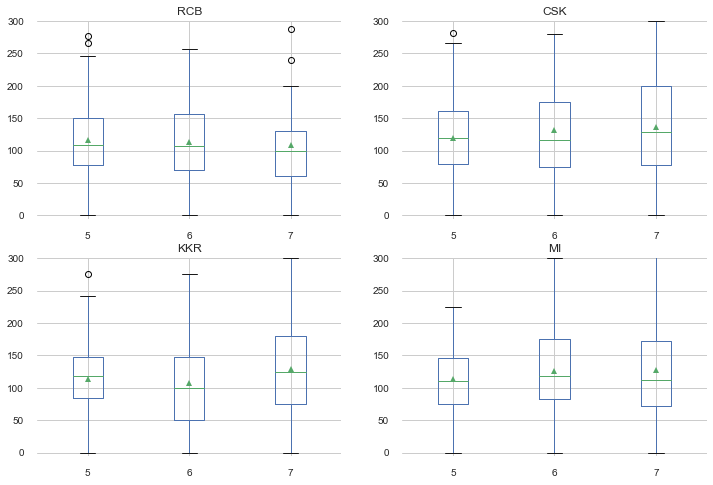

In [53]:
fig,ax = plt.subplots(2,2, figsize=(12,8))
rcb.plot.box(grid='True', showmeans=True, ax=ax[0][0], ylim=(-5, 300), title = 'RCB')
csk.plot.box(grid='True', showmeans=True, ax=ax[0][1], ylim=(-5, 300), title = 'CSK')
kkr.plot.box(grid='True', showmeans=True, ax=ax[1][0], ylim=(-5, 300), title = 'KKR')
mi.plot.box(grid='True', showmeans=True, ax=ax[1][1], ylim=(-5, 300), title = 'MI')

<a id=section50303></a>
### 5.3.3 How is RCB's scoring range for all matches?

Text(0, 0.5, 'Runs')

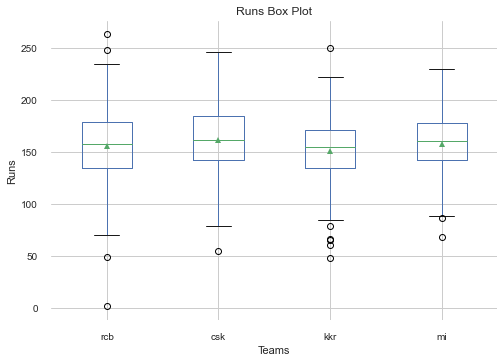

In [54]:
rcb = deliveries[deliveries.batting_team=='Royal Challengers Bangalore'].groupby(['match_id']).sum().total_runs
score_rcb = pd.DataFrame(rcb)
score_rcb.reset_index(inplace = True, drop=True)
score_rcb.rename(columns = {'total_runs':'rcb'}, inplace = True)
csk = deliveries[deliveries.batting_team=='Chennai Super Kings'].groupby(['match_id']).sum().total_runs
score_csk = pd.DataFrame(csk)
score_csk.reset_index(inplace = True, drop=True)
score_csk.rename(columns = {'total_runs':'csk'}, inplace = True)
kkr = deliveries[deliveries.batting_team=='Kolkata Knight Riders'].groupby(['match_id']).sum().total_runs
score_kkr = pd.DataFrame(kkr)
score_kkr.reset_index(inplace = True, drop=True)
score_kkr.rename(columns = {'total_runs':'kkr'}, inplace = True)
mi = deliveries[deliveries.batting_team=='Mumbai Indians'].groupby(['match_id']).sum().total_runs
score_mi = pd.DataFrame(mi)
score_mi.reset_index(inplace = True, drop=True)
score_mi.rename(columns = {'total_runs':'mi'}, inplace = True)

score = pd.concat([score_rcb, score_csk, score_kkr, score_mi], axis = 1)
df = pd.DataFrame(score, columns=['rcb', 'csk', 'kkr', 'mi'])
df.plot.box(grid='True', showmeans=True)
plt.title('Runs Box Plot')
plt.xlabel('Teams')
plt.ylabel('Runs')

The outliers could be ignored as they may belong to DL matches or matches drawn due to rain. 
RCB has a higher range of scores but its Q2 and Q3 lie similar to other teams and the means are also comparable.

<a id=section50304></a>
### 5.3.4 What is RCB's strike rate in last 30 balls (death batting)?

In [55]:
#Runs Scored
score = deliveries[deliveries.batting_team=='Royal Challengers Bangalore'].groupby(['match_id']).tail(30)
rcb_runs = score.groupby(['match_id']).sum().total_runs.mean()

score = deliveries[deliveries.batting_team=='Chennai Super Kings'].groupby(['match_id']).tail(30)
csk_runs = score.groupby(['match_id']).sum().total_runs.mean()

score = deliveries[deliveries.batting_team=='Mumbai Indians'].groupby(['match_id']).tail(30)
kkr_runs = score.groupby(['match_id']).sum().total_runs.mean()

score = deliveries[deliveries.batting_team=='Kolkata Knight Riders'].groupby(['match_id']).tail(30)
mi_runs = score.groupby(['match_id']).sum().total_runs.mean()

#Wickets given
wickets = deliveries[deliveries.batting_team=='Royal Challengers Bangalore'].groupby(['match_id']).tail(30)
rcb_wickets = wickets[wickets.player_dismissed.notnull()==True].groupby(['match_id']).count().player_dismissed.mean()

wickets = deliveries[deliveries.batting_team=='Chennai Super Kings'].groupby(['match_id']).tail(30)
csk_wickets = wickets[wickets.player_dismissed.notnull()==True].groupby(['match_id']).count().player_dismissed.mean()

wickets = deliveries[deliveries.batting_team=='Kolkata Knight Riders'].groupby(['match_id']).tail(30)
kkr_wickets = wickets[wickets.player_dismissed.notnull()==True].groupby(['match_id']).count().player_dismissed.mean()

wickets = deliveries[deliveries.batting_team=='Mumbai Indians'].groupby(['match_id']).tail(30)
mi_wickets = wickets[wickets.player_dismissed.notnull()==True].groupby(['match_id']).count().player_dismissed.mean()

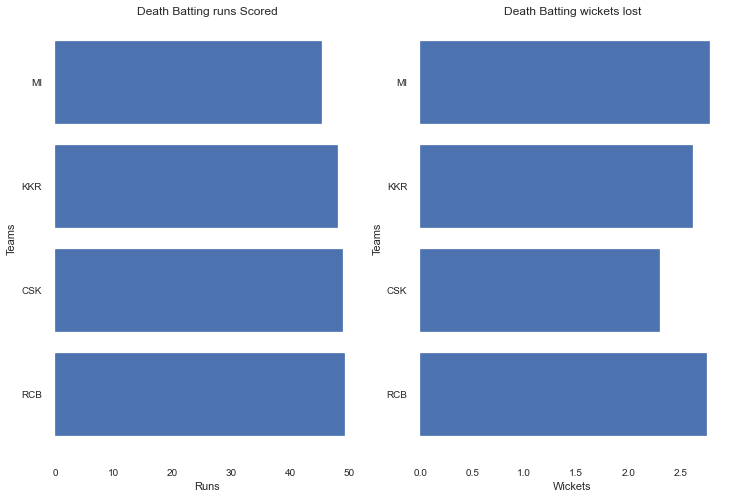

In [56]:
fig,a = plt.subplots(1,2, figsize=(12,8))
y = ['RCB', 'CSK', 'KKR', 'MI']
x1 = [rcb_runs, csk_runs, kkr_runs, mi_runs]
x2 = [rcb_wickets, csk_wickets, kkr_wickets, mi_wickets]
a[0].barh(y,x1)
a[0].set_title('Death Batting runs Scored')
a[0].set_xlabel('Runs')
a[0].set_ylabel('Teams')
a[1].barh(y, x2)
a[1].set_title('Death Batting wickets lost')
a[1].set_xlabel('Wickets')
a[1].set_ylabel('Teams')
plt.show()

RCB has fared well in terms of death batting. Though they give more wickets in the last 30 balls, on an average they have also scored more than other successfull teams.

<a id=section504></a>
## 5.4 Analyze how is RCB's bowling

<a id=section50401></a>
### 5.4.1 How is the wickets scalped range and runs conceded range for RCB for all matches?

In [57]:
rcb = deliveries[(deliveries.bowling_team=='Royal Challengers Bangalore') & (deliveries.dismissal_kind.notnull()==True)].groupby(['match_id']).count().ball
wicket_rcb = pd.DataFrame(rcb)
wicket_rcb.reset_index(inplace = True, drop=True)
wicket_rcb.rename(columns = {'ball':'rcb_wi'}, inplace = True)
csk = deliveries[(deliveries.bowling_team=='Chennai Super Kings') & (deliveries.dismissal_kind.notnull()==True)].groupby(['match_id']).count().ball
wicket_csk = pd.DataFrame(csk)
wicket_csk.reset_index(inplace = True, drop=True)
wicket_csk.rename(columns = {'ball':'csk_wi'}, inplace = True)
kkr = deliveries[(deliveries.bowling_team=='Kolkata Knight Riders') & (deliveries.dismissal_kind.notnull()==True)].groupby(['match_id']).count().ball
wicket_kkr = pd.DataFrame(kkr)
wicket_kkr.reset_index(inplace = True, drop=True)
wicket_kkr.rename(columns = {'ball':'kkr_wi'}, inplace = True)
mi = deliveries[(deliveries.bowling_team=='Mumbai Indians') & (deliveries.dismissal_kind.notnull()==True)].groupby(['match_id']).count().ball
wicket_mi = pd.DataFrame(mi)
wicket_mi.reset_index(inplace = True, drop=True)
wicket_mi.rename(columns = {'ball':'mi_wi'}, inplace = True)
score = pd.concat([wicket_rcb, wicket_csk, wicket_kkr, wicket_mi], axis = 1)
df_wickets = pd.DataFrame(score, columns=['rcb_wi', 'csk_wi', 'kkr_wi', 'mi_wi'])

rcb = deliveries[deliveries.bowling_team=='Royal Challengers Bangalore'].groupby(['match_id']).sum().total_runs
score_rcb = pd.DataFrame(rcb)
score_rcb.reset_index(inplace = True, drop=True)
score_rcb.rename(columns = {'total_runs':'rcb_run'}, inplace = True)
csk = deliveries[deliveries.bowling_team=='Chennai Super Kings'].groupby(['match_id']).sum().total_runs
score_csk = pd.DataFrame(csk)
score_csk.reset_index(inplace = True, drop=True)
score_csk.rename(columns = {'total_runs':'csk_run'}, inplace = True)
kkr = deliveries[deliveries.bowling_team=='Kolkata Knight Riders'].groupby(['match_id']).sum().total_runs
score_kkr = pd.DataFrame(kkr)
score_kkr.reset_index(inplace = True, drop=True)
score_kkr.rename(columns = {'total_runs':'kkr_run'}, inplace = True)
mi = deliveries[deliveries.bowling_team=='Mumbai Indians'].groupby(['match_id']).sum().total_runs
score_mi = pd.DataFrame(mi)
score_mi.reset_index(inplace = True, drop=True)
score_mi.rename(columns = {'total_runs':'mi_run'}, inplace = True)
score = pd.concat([score_rcb, score_csk, score_kkr, score_mi], axis = 1)
df_score = pd.DataFrame(score, columns=['rcb_run', 'csk_run', 'kkr_run', 'mi_run'])

Text(0, 0.5, 'Runs')

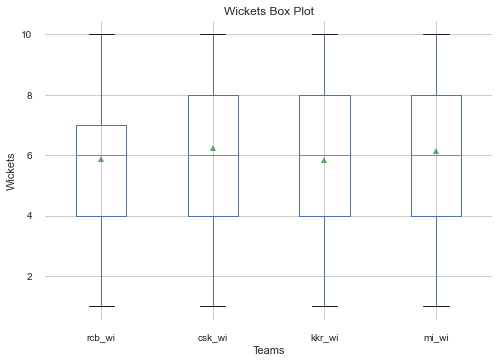

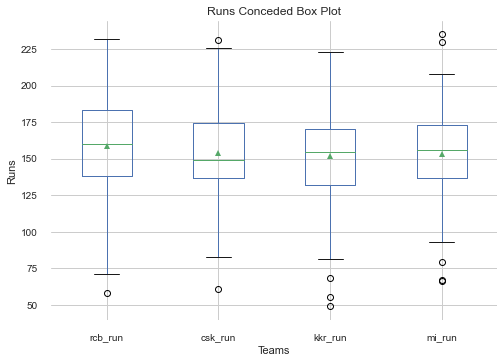

In [58]:
df_wickets.plot.box(grid='True', showmeans = True)
plt.title('Wickets Box Plot')
plt.xlabel('Teams')
plt.ylabel('Wickets')
df_score.plot.box(grid='True', showmeans=True)
plt.title('Runs Conceded Box Plot')
plt.xlabel('Teams')
plt.ylabel('Runs')

Wickets box plot - RCB Bowling is comparitively weaker in terms of wicket taking as can be observed from the above plot. RCB's Q3 has lower values while rest of the teams have higher values. The mean as well is lower as compared to CSK and MI

Runs conceded box plot - RCB has consistently conceded more runs as compared to other teams. Q2, Q3 and the mean, all are higher for RCB. 

Both the parameters are not stand alone, as scalping less wickets could result in conceding more runs as better batsmen are still around scoring for opponent's team.

<a id=section50402></a>
### 5.4.2 How many players from each team contribute more than 10 wickets in a season?

In [59]:
#Extract the season_wise wickets for each player
wickets = ipl_data[(ipl_data.bowling_team=='Royal Challengers Bangalore') & (ipl_data.dismissal_kind.notnull()==True)].groupby(['season', 'bowler']).count().ball
#Get the list of bowlers who got more than 15 wickets in each season
df = pd.DataFrame(wickets[wickets>15])
df.reset_index(inplace=True)
#Count the No of players who have got more than 15 wickets in each season
rcb = df.groupby(['season']).count().bowler

#Extract the season_wise wickets for each player
wickets = ipl_data[(ipl_data.bowling_team=='Chennai Super Kings') & (ipl_data.dismissal_kind.notnull()==True)].groupby(['season', 'bowler']).count().ball
#Get the list of bowlers who got more than 15 wickets in each season
df = pd.DataFrame(wickets[wickets>15])
df.reset_index(inplace=True)
#Count the No of players who have got more than 15 wickets in each season
csk = df.groupby(['season']).count().bowler

#Extract the season_wise wickets for each player
wickets = ipl_data[(ipl_data.bowling_team=='Kolkata Knight Riders') & (ipl_data.dismissal_kind.notnull()==True)].groupby(['season', 'bowler']).count().ball
#Get the list of bowlers who got more than 15 wickets in each season
df = pd.DataFrame(wickets[wickets>15])
df.reset_index(inplace=True)
#Count the No of players who have got more than 15 wickets in each season
kkr = df.groupby(['season']).count().bowler

#Extract the season_wise wickets for each player
wickets = ipl_data[(ipl_data.bowling_team=='Mumbai Indians') & (ipl_data.dismissal_kind.notnull()==True)].groupby(['season', 'bowler']).count().ball
#Get the list of bowlers who got more than 15 wickets in each season
df = pd.DataFrame(wickets[wickets>15])
df.reset_index(inplace=True)
#Count the No of players who have got more than 15 wickets in each season
mi = df.groupby(['season']).count().bowler

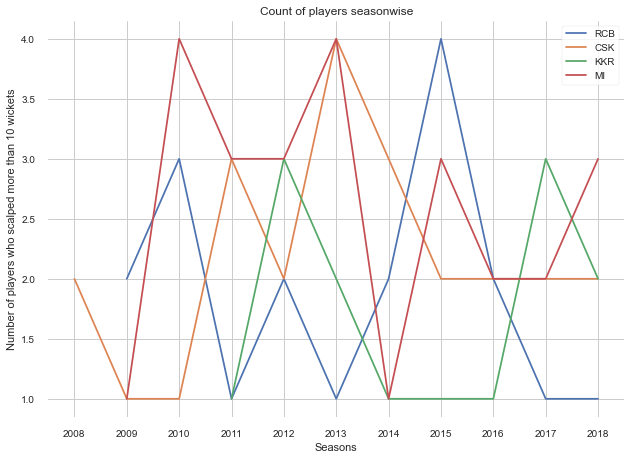

In [60]:
years = list(np.arange(2008,2019,1))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1]) # main axes
x1 = list(rcb.index.values)
y1 = list(rcb.values)
x2 = list(csk.index.values)
y2 = list(csk.values)
x3 = list(kkr.index.values)
y3 = list(kkr.values)
x4 = list(mi.index.values)
y4 = list(mi.values)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
ax.set_ylabel('Number of players who scalped more than 10 wickets')
ax.set_xlabel('Seasons')
ax.set_title('Count of players seasonwise')
plt.legend(labels=['RCB', 'CSK', 'KKR', 'MI'])
ax.set_xticks(years)
ax.grid(True)

Other than in 2009 and 2015, there have been other teams with more wicket takers contributing the the team's success rather than pressurizing a single bowler.

<a id=section50403></a>
### 5.4.3 How is RCB's bowling in last 30 balls (death bowling)?

In [61]:
#Runs conceded
score = ipl_data[ipl_data.bowling_team=='Royal Challengers Bangalore'].groupby(['match_id']).tail(30)
rcb_runs = score.groupby(['match_id']).sum().total_runs.mean()

score = ipl_data[ipl_data.bowling_team=='Chennai Super Kings'].groupby(['match_id']).tail(30)
csk_runs = score.groupby(['match_id']).sum().total_runs.mean()

score = ipl_data[ipl_data.bowling_team=='Kolkata Knight Riders'].groupby(['match_id']).tail(30)
kkr_runs = score.groupby(['match_id']).sum().total_runs.mean()

score = ipl_data[ipl_data.bowling_team=='Mumbai Indians'].groupby(['match_id']).tail(30)
mi_runs = score.groupby(['match_id']).sum().total_runs.mean()



#Wickets taken
wickets = ipl_data[ipl_data.bowling_team=='Royal Challengers Bangalore'].groupby(['match_id']).tail(30)
rcb_wickets = wickets[wickets.player_dismissed.notnull()==True].groupby(['match_id']).count().player_dismissed.mean()

wickets = ipl_data[ipl_data.bowling_team=='Chennai Super Kings'].groupby(['match_id']).tail(30)
csk_wickets = wickets[wickets.player_dismissed.notnull()==True].groupby(['match_id']).count().player_dismissed.mean()

wickets = ipl_data[ipl_data.bowling_team=='Kolkata Knight Riders'].groupby(['match_id']).tail(30)
kkr_wickets = wickets[wickets.player_dismissed.notnull()==True].groupby(['match_id']).count().player_dismissed.mean()

wickets = ipl_data[ipl_data.bowling_team=='Mumbai Indians'].groupby(['match_id']).tail(30)
mi_wickets = wickets[wickets.player_dismissed.notnull()==True].groupby(['match_id']).count().player_dismissed.mean()

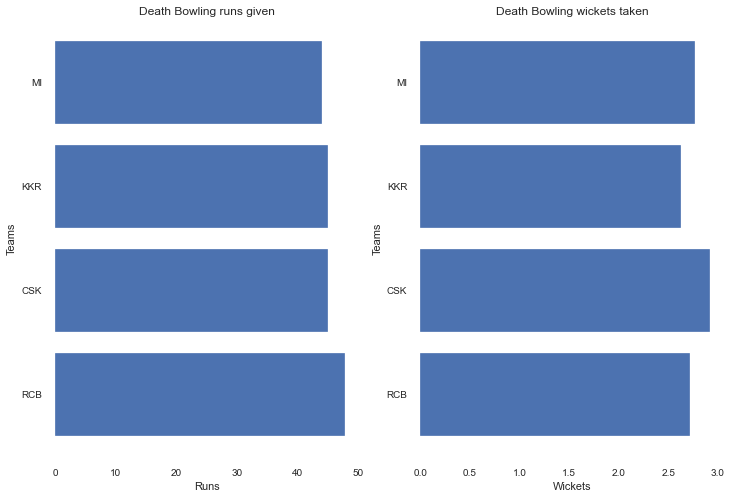

In [62]:
fig,a = plt.subplots(1,2, figsize=(12,8))
y = ['RCB', 'CSK', 'KKR', 'MI']
x1 = [rcb_runs, csk_runs, kkr_runs, mi_runs]
x2 = [rcb_wickets, csk_wickets, kkr_wickets, mi_wickets]
a[0].barh(y,x1)
a[0].set_title('Death Bowling runs given')
a[0].set_xlabel('Runs')
a[0].set_ylabel('Teams')
a[1].barh(y, x2)
a[1].set_title('Death Bowling wickets taken')
a[1].set_xlabel('Wickets')
a[1].set_ylabel('Teams')
plt.show()

RCB’s bowling is subpar during the death overs. Wicket taking ability is also slightly lower as compared to MI and CSK even though its approx. equal to KKR

<a id=section50404></a>
### 5.4.4 How many players from each team contribute more than 1 wicket in a match?

In [63]:
#RCB
#Extract the wickets for each player
wickets = deliveries[(deliveries.bowling_team=='Royal Challengers Bangalore')&(deliveries.player_dismissed.notnull()==True)].groupby(['match_id','bowler']).count().player_dismissed
df = pd.DataFrame(wickets[wickets>=2])
df.reset_index(inplace=True)
df
#Count the % of matches in which more than 1 bowler have contributed 2+ wickets
temp = df.groupby(['match_id']).count().bowler
temp
percentage_rcb = len(temp[temp>2])*100/len(matches[(matches.team1=='Royal Challengers Bangalore')|(matches.team2=='Royal Challengers Bangalore')])


#CSK
#Extract the wickets for each player
wickets = deliveries[(deliveries.bowling_team=='Chennai Super Kings')&(deliveries.player_dismissed.notnull()==True)].groupby(['match_id','bowler']).count().player_dismissed
df = pd.DataFrame(wickets[wickets>=2])
df.reset_index(inplace=True)
df
#Count the % of matches in which more than 1 bowler have contributed 2+ wickets
temp = df.groupby(['match_id']).count().bowler
temp
percentage_csk = len(temp[temp>2])*100/len(matches[(matches.team1=='Chennai Super Kings')|(matches.team2=='Chennai Super Kings')])

#KKR
#Extract the wickets for each player
wickets = deliveries[(deliveries.bowling_team=='Kolkata Knight Riders')&(deliveries.player_dismissed.notnull()==True)].groupby(['match_id','bowler']).count().player_dismissed
df = pd.DataFrame(wickets[wickets>=2])
df.reset_index(inplace=True)
df
#Count the % of matches in which more than 1 bowler have contributed 2+ wickets
temp = df.groupby(['match_id']).count().bowler
temp
percentage_kkr = len(temp[temp>2])*100/len(matches[(matches.team1=='Kolkata Knight Riders')|(matches.team2=='Kolkata Knight Riders')])

#MI
#Extract the wickets for each player
wickets = deliveries[(deliveries.bowling_team=='Mumbai Indians')&(deliveries.player_dismissed.notnull()==True)].groupby(['match_id','bowler']).count().player_dismissed
df = pd.DataFrame(wickets[wickets>=2])
df.reset_index(inplace=True)
df
#Count the % of matches in which more than 1 bowler have contributed 2+ wickets
temp = df.groupby(['match_id']).count().bowler
temp
percentage_mi = len(temp[temp>2])*100/len(matches[(matches.team1=='Mumbai Indians')|(matches.team2=='Mumbai Indians')])

[percentage_rcb, percentage_csk, percentage_kkr, percentage_mi]

[20.481927710843372, 23.80952380952381, 20.73170731707317, 25.730994152046783]

Text(0.5, 1.0, 'MI - % of matches >2 players scalped 2+')

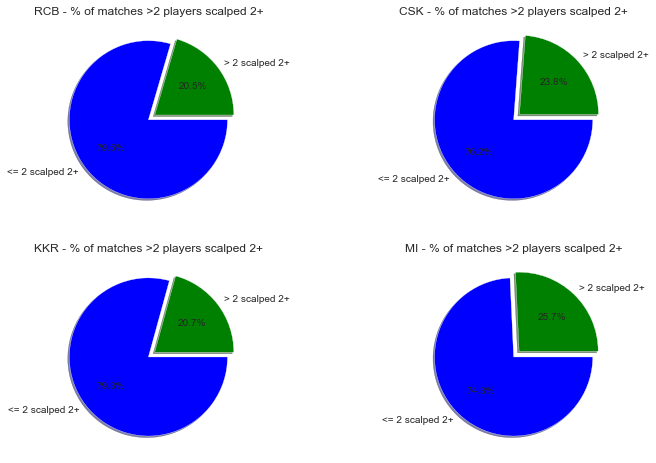

In [64]:
fig,ax = plt.subplots(2,2, figsize=(12,8))
label = ['> 2 scalped 2+', '<= 2 scalped 2+']
colors = ['green', 'blue']
explode = (0.1,0)
rcb_per = [percentage_rcb, 100-percentage_rcb]
ax[0][0].pie(rcb_per, labels = label, colors= colors, explode = explode,autopct='%1.1f%%', shadow= True)
ax[0][0].set_title('RCB - % of matches >2 players scalped 2+')

csk_per = [percentage_csk, 100-percentage_csk]
ax[0][1].pie(csk_per, labels = label, colors= colors, explode = explode,autopct='%1.1f%%', shadow= True)
ax[0][1].set_title('CSK - % of matches >2 players scalped 2+')

kkr_per = [percentage_kkr, 100-percentage_kkr]
ax[1][0].pie(kkr_per, labels = label, colors= colors, explode = explode,autopct='%1.1f%%', shadow= True)
ax[1][0].set_title('KKR - % of matches >2 players scalped 2+')

mi_per = [percentage_mi, 100-percentage_mi]
ax[1][1].pie(mi_per, labels = label, colors= colors, explode = explode,autopct='%1.1f%%', shadow= True)
ax[1][1].set_title('MI - % of matches >2 players scalped 2+')

<a id=section6></a>
## 6. Conclusion

- We have analysed RCB over 4 major parameters. 1) How has extraneous factors affected? 2) How has pressure affected? 3) How has poor batting affected? 4) How was poor bowling affected? These analysis is done keeping in mind the objective of searching actionable insights to improve RCB's performance. This doesn't mean that RCB doesn't have any positive aspects. Only the negative aspects are observed to provide construvtive criticism

- There is lot of things which RCB can improve to overcome shortcomings and aim to grab the Indian Premier League Title.

<a id=section601></a>
### 6.1 Actionable Insights

#### Extraneous factors 
- Can consult experts / send vice-captain to attend the toss as toss is an important factor
- Look into options such as altering the pitch, setting the boundaries according to team’s strength

#### Pressure situation
- Hire psychologist to train players to tackle pressure situations and keep calm
- Backing, contribution of every team member and having self-confidence to face any challenges

#### Batting
- More players need to contribute runs, improve positions 5&6 to reduce pressure on top 4 .
- Necessary to find an all-rounder batsmen for position 7. He is going to make a difference in close encounters, high chases and when the top positions falls quickly

#### Bowling
- Needs to select more wicket taking bowlers. That will indirectly help in putting runs on a leash
- Death bowling is an art of mixing up the balls, holding nerve and reading the batsman. Training in this area needs to be provided or experts should be selected during auction
